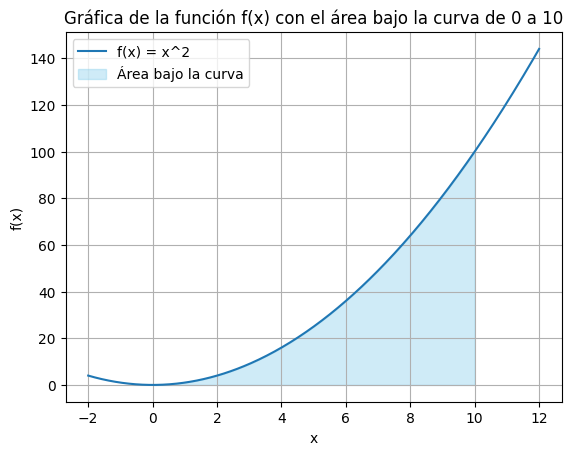

In [9]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Función a integrar
def f(x):
    return x**2

# Graficar la función f(x)
x = np.linspace(-2, 12, 400)
y = f(x)

plt.plot(x, y, label='f(x) = x^2')
plt.fill_between(x, y, where=[(xi >= 0 and xi <= 10) for xi in x], color='skyblue', alpha=0.4, label='Área bajo la curva')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x) con el área bajo la curva de 0 a 10')
plt.legend()
plt.grid(True)
plt.show()


# Aproximación de una integral secuencial

In [13]:
def calcular_integral(a: float, b: float, n: int) -> float:
    # a: límite inferior
    # b: límite superior
    # n: número de rectángulos
    ancho_rectangulo = (b - a) / n
    area_total = 0.0
    for i in range(n):
        x = a + i * ancho_rectangulo
        area_total += f(x) * ancho_rectangulo
    return area_total

a: float = 0  # Límite inferior
b: float = 10 # Límite superior
n: int = 10000000  # Número de rectángulos

inicio = time.time()
integral = calcular_integral(a, b, n)
fin = time.time()
print(f"Integral: {integral:.3f}")
print(f"Tiempo (Sin Paralelismo): {fin - inicio:.4f} segundos")


Integral: 333.333
Tiempo (Sin Paralelismo): 2.9003 segundos


# Aproximación de una integral con multiprocesamiento

In [14]:
import multiprocessing
from typing import List, Tuple

def calcular_integral_parcial(a_parcial: float, b_parcial: float, n_parcial: int) -> float:
    # a_parcial: límite inferior de la parte
    # b_parcial: límite superior de la parte
    # n_parcial: número de rectángulos en la parte
    ancho_rectangulo = (b_parcial - a_parcial) / n_parcial
    area_total = 0.0
    for i in range(n_parcial):
        x = a_parcial + i * ancho_rectangulo
        area_total += f(x) * ancho_rectangulo
    return area_total

def calcular_integral_paralelo(a: float, b: float, n: int, num_procesos: int) -> float:
    # Dividir el intervalo de integración en partes iguales
    ancho_parte = (b - a) / num_procesos
    n_parcial = n // num_procesos  # Número de rectángulos por parte

    # Crear una lista con los argumentos para cada proceso
    argumentos: List[Tuple[float, float, int]] = []
    for i in range(num_procesos):
        inicio_parte = a + i * ancho_parte
        fin_parte = a + (i + 1) * ancho_parte
        argumentos.append((inicio_parte, fin_parte, n_parcial))

    # Crear un pool de procesos
    with multiprocessing.Pool(processes=num_procesos) as pool:
        # Calcular la integral parcial en cada proceso
        resultados: List[float] = pool.starmap(calcular_integral_parcial, argumentos)

    # Sumar los resultados parciales
    integral_total = sum(resultados)
    return integral_total

a: float = 0  # Límite inferior
b: float = 10 # Límite superior
n: int = 10000000  # Número de rectángulos
num_procesos: int = multiprocessing.cpu_count()

inicio = time.time()
integral = calcular_integral_paralelo(a, b, n, num_procesos)
fin = time.time()
print(f"Integral (Con Paralelismo): {integral:.3f}")
print(f"Tiempo (Con Paralelismo): {fin - inicio:.4f} segundos")


Integral (Con Paralelismo): 333.333
Tiempo (Con Paralelismo): 1.0002 segundos
